<a href="https://colab.research.google.com/github/Prasad-Mamidi/Machine_Learning/blob/main/Sentiment_analysis_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

##Data Importing

In [ ]:
twitter_data = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning/main/Datasets/Twitter_Sentiment/Twitter_Sentiment_Data.csv")
twitter_data.sample(10)

,tweet_ID,raw_tweet,sentiment_label
7727,bb6bbbc15b,"sweet, I`m trying to earn my crown for gluten...",positive
9989,d07ea246d5,hahaha u can use my phone everywhere... just ...,positive
14530,4ed8045d45,ur moving to leeds?? wut are u doing up there...,neutral
1907,cebf72f0dc,"Swords make everyone sexy. Oh, Harold.",positive
8266,81094a0fb7,Yes yes she is indeed nuts! ... Like me... th...,negative
22828,1da9416c37,goodnight all in the twitterverse,positive
2430,f804ea3526,No but I just checked and got it LOL. You are...,positive
12409,f4e5e417d7,mmm nandos is good (y) and topshop rules i am...,negative
22735,d7abeea31f,"Urm, ouch, that sucks. You need crutches? Wh...",neutral
23638,662075da2a,"thanks for that, now i learned something new ...",positive


## Convert everything to string and lowercase

In [ ]:
# twitter_data["tweet_lower"] = twitter_data["raw_tweet"].astype(str).str.lower()
twitter_data["tweet_lower"] = twitter_data["raw_tweet"].apply(lambda x:str(x).lower())

twitter_data

,tweet_ID,raw_tweet,sentiment_label,tweet_lower
0,cb774db0d1,"I`d have responded, if I were going",neutral,"i`d have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,negative,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,negative,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"sons of ****, why couldn`t they put them on t..."
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative,wish we could come see u on denver husband l...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,i`ve wondered about rake to. the client has ...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,yay good for both of you. enjoy the break - y...
27479,ed167662a5,But it was worth it ****.,positive,but it was worth it ****.


## Tokenizing

In [ ]:
from nltk.tokenize import word_tokenize
twitter_data["tokenized"] = twitter_data["tweet_lower"].apply(lambda x:word_tokenize(x))
print(twitter_data[["raw_tweet","tokenized"]].head())

                                           raw_tweet  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                                           tokenized  
0  [i, `, d, have, responded, ,, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                  [my, boss, is, bullying, me, ...]  
3             [what, interview, !, leave, me, alone]  
4  [sons, of, *, *, *, *, ,, why, couldn, `, t, t...  


## Expanding Short Forms

In [ ]:
contractions_dict = {
    "aren't": "are not","can't": "cannot","could've": "could have","couldn't": "could not","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not",
    "hasn't": "has not","haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "i'd": "I would",
    "I'll": "I will",
    "It's": "it is",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "'cause": "because",
    "daren't": "dare not","needn't": "need not",
    "oughtn't": "ought not","mightn't": "might not","mustn't": "must not","usedn't": "used not","wouldn't": "would not","couldn't": "could not","shouldn't": "should not",
    "wouldn't've": "would not have","couldn't've": "could not have","mightn't've": "might not have","mustn't've": "must not have","needn't've": "need not have","oughtn't've": "ought not have","shan't've": "shall not have","wasn't": "was not","weren't": "were not","won't've": "will not have","wouldn't've": "would not have",
}


In [ ]:
def expanded_form(text):
  text = text.replace('`', "'")
  if text in contractions_dict.keys():
    tx = contractions_dict[text]
  else:
    tx =text
  return tx

In [ ]:
x = str(twitter_data["tweet_lower"][6207])
x = x.split()
print(x)
print([expanded_form(text) for text in x])


['it`s', 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']
['it is', 'under', 'a', 'honeymoon', 'by', 'the', 'good', 'life']


In [ ]:
twitter_data["tweet_expanded"] = twitter_data["tweet_lower"].apply(lambda x:[expanded_form(t) for t in x.split()] )
twitter_data.head()

,tweet_ID,raw_tweet,sentiment_label,tweet_lower,tokenized,tweet_expanded
0,cb774db0d1,"I`d have responded, if I were going",neutral,"i`d have responded, if i were going","[i, `, d, have, responded, ,, if, i, were, going]","[I would, have, responded,, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego!!!,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me...,negative,my boss is bullying me...,"[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me...]"
3,9642c003ef,what interview! leave me alone,negative,what interview! leave me alone,"[what, interview, !, leave, me, alone]","[what, interview!, leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"sons of ****, why couldn`t they put them on t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, ****,, why, could not, they, put, t..."


##Removing Stopwords

###NLTK STOP WORDS

In [ ]:
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words("english")
print(f"Number of stopwords in nltk ===> {len(nltk_stopwords)}")
print(sorted(nltk_stopwords))

Number of stopwords in nltk ===> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print(f"Number of stopwords in spacy ====> {len(spacy_stopwords)}")
print(sorted(spacy_stopwords))

Number of stopwords in spacy ====> 326
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'h

In [ ]:
twitter_data["removed_stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[word for word in x if word not in spacy_stopwords ])
print(twitter_data[["raw_tweet","removed_stopwords"]].sample(10))

                                               raw_tweet  \
16643   and the 'fuck  ' was because I dont get my gi...   
5676                 Just got booked my ticket to athens   
24837                 Just got a new Ipod.  Life`s Good.   
26516           Is there going to Sausage on it  yum yum   
14631                                 #BGT That poor kid   
1710    yeah i know  been dealin with it for over 2 y...   
15868       Hmm it seems to me _gun needs the followers.   
14957                                   Chilling at home   
19351   dude fail.  i know exactly where this place i...   
2239   I REALLY  should have gone to the Chiropractor...   

                                       removed_stopwords  
16643  ['fuck, ', dont, gift!, exited, it,, sooo, awe...  
5676                       [got, booked, ticket, athens]  
24837                   [got, new, ipod., life's, good.]  
26516                         [going, sausage, yum, yum]  
14631                                  [#bgt

##Regular Expressions

In [ ]:
import re
import string
def remove_pattern(text):
  x= str(text)
  x = re.sub(r'(http[s]?://\S+|www\.\S+)',"",x)
  x = re.sub(r'[{}]'.format(re.escape(string.punctuation)),"",x)
  x = re.sub(r"\d+","",x)
  return x

In [ ]:
twitter_data["regex_removed"] = twitter_data["removed_stopwords"].apply(lambda x:remove_pattern(x))
print(twitter_data[["removed_stopwords","regex_removed"]])

                                       removed_stopwords  \
0                           [I would, responded,, going]   
1                       [sooo, sad, miss, san, diego!!!]   
2                                [boss, bullying, me...]   
3                                    [interview!, leave]   
4             [sons, ****,, could not, releases, bought]   
...                                                  ...   
27476  [wish, come, u, denver, husband, lost, job, af...   
27477  [i've, wondered, rake, to., client, clear, .ne...   
27478  [yay, good, you., enjoy, break, -, probably, n...   
27479                                     [worth, ****.]   
27480  [flirting, going, -, atg, smiles., yay., ((hug...   

                                           regex_removed  
0                                I would responded going  
1                                sooo sad miss san diego  
2                                       boss bullying me  
3                                        in

##Spelling correction

In [ ]:
from textblob import TextBlob
def correct_spelling(text):
  text = str(text)
  x = TextBlob(text)
  return x.correct()
print(correct_spelling("I have a greaat idear for the buisness projecct."))

I have a great dear for the business project.


## Lemmatization or Root Form

In [ ]:
spacy_model = spacy.load('en_core_web_sm')
twitter_data["Lemmatized"] = twitter_data["regex_removed"].apply(lambda x:" ".join ([t.lemma_ for t in spacy_model(str(x)) if t.lemma_ != "-PRON-"]))

In [ ]:
print(twitter_data[["regex_removed","Lemmatized"]])

                                           regex_removed  \
0                                I would responded going   
1                                sooo sad miss san diego   
2                                       boss bullying me   
3                                        interview leave   
4                        sons  could not releases bought   
...                                                  ...   
27476         wish come u denver husband lost job afford   
27477  ive wondered rake to client clear net only do ...   
27478  yay good you enjoy break  probably need hectic...   
27479                                             worth    
27480                flirting going  atg smiles yay hugs   

                                              Lemmatized  
0                                     I would respond go  
1                                sooo sad miss san diego  
2                                           boss bully I  
3                                        in

##Final Cleaning

In [ ]:
twitter_data["final_cleaned"] = twitter_data["Lemmatized"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords])
print(twitter_data[["Lemmatized","final_cleaned"]])

                                              Lemmatized  \
0                                     I would respond go   
1                                sooo sad miss san diego   
2                                           boss bully I   
3                                        interview leave   
4                            son   could not release buy   
...                                                  ...   
27476         wish come u denver husband lose job afford   
27477  I ve wonder rake to client clear net only do n...   
27478  yay good you enjoy break   probably need hecti...   
27479                                              worth   
27480                       flirt go   atg smile yay hug   

                                           final_cleaned  
0                                           [I, respond]  
1                          [sooo, sad, miss, san, diego]  
2                                       [boss, bully, I]  
3                                     [inte

In [ ]:
twitter_data["final_cleaned"] = twitter_data["final_cleaned"].apply(lambda x:" ".join(x))

In [ ]:
twitter_data.to_csv("Twitter_Sentiment_cleaned_data.csv",index=False)

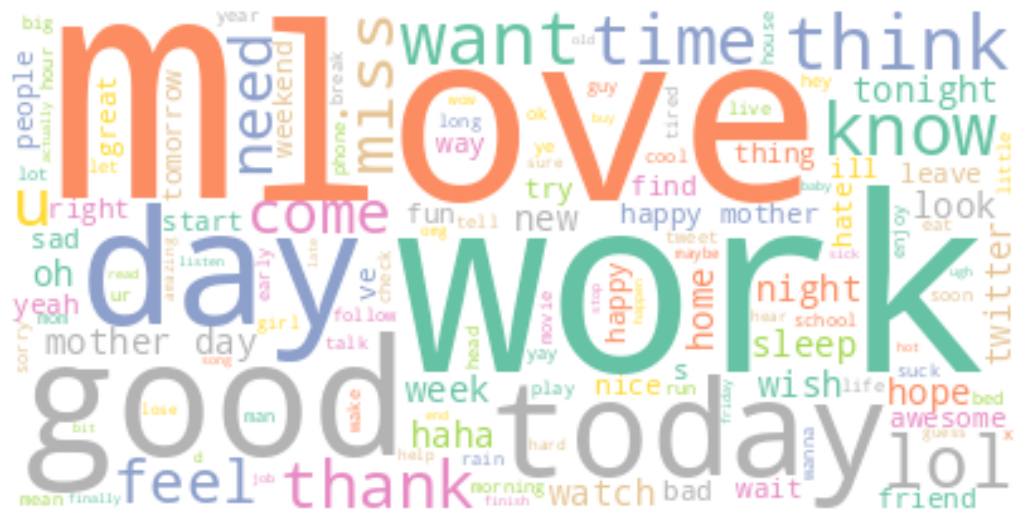

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(twitter_data["final_cleaned"])
wordcloud = WordCloud(colormap="Set2",background_color="white").generate(text)
plt.figure( figsize=(13,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Document Term Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=5)
dtm = pd.DataFrame(cv.fit_transform(twitter_data["final_cleaned"]).toarray(),columns=cv.get_feature_names_out(),index=None)
dtm

,aaaah,aah,abandon,ability,abit,able,absolutely,abt,ac,academy,...,zero,zombie,zone,zoo,½m,½re,½s,½t,½ve,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feaures,Target data

In [ ]:
#shape before removing neutral
dtm.shape

(27481, 3470)

In [ ]:
dtm["sentiment_label"] = twitter_data["sentiment_label"]
#remove neutrals
dtm = dtm[dtm["sentiment_label"]!="neutral"]

In [ ]:
#shape after removing neutral
dtm.shape

(16363, 3471)

In [ ]:
print((dtm["sentiment_label"]).value_counts())

sentiment_label
positive    8582
negative    7781
Name: count, dtype: int64


In [ ]:
from  sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X = dtm.drop("sentiment_label",axis=1)
y = dtm["sentiment_label"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13090, 3470)
(3273, 3470)
(13090,)
(3273,)


## Build Naive Bayes Model

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
print(f"Train Accuracy: {model.score(X_train,y_train)}")
print(f"Test Accuracy : {model.score(X_test,y_test)}")

Train Accuracy: 0.8889992360580596
Test Accuracy : 0.846929422548121
